## Rotinas de programação desenvolvidas 

Disciplina(s): Otimização de Processos (COQ-897)

Rotinas desenvolidas:

- Cinética da reação do HMF 
- Estimativa de parâmetros para balanço de carbono
- Rotinas de otimização
- Análise da difusão extra e intrapartícula

## Ajuste para viscosidade e densidade

Regressão linear com dados da literatura para ajuste da viscosidade e densidade da água em função da temperatura de processo

In [2]:
## Importando bibliotecas para o trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bibliotecas para regressão linear 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Valores para ajuste da função de densidade da água em função de T

vetorT1 = np.arange(293,383,10)                                        # Temperatura (K)
rho = [998.2, 995.7, 992.2, 988.0, 983.2, 977.8, 971.8, 965.3, 958.4]  # Densidade (kg/m³)

# Valores para ajuste da funçaõ de viscosidade da água em função de T

vetorT2 = np.arange(313,383,10)                                         # Temperatura (K)
visc = [6.53e-4, 5.47e-4, 4.66e-4, 4.04e-4, 3.54e-4, 3.15e-4, 2.82e-4]  # Viscosidade (kg/m s)

# Manipulação dos dados para regressão linear

vetorT1 = np.reshape(np.array(vetorT1), [len(vetorT1),1])
vetorT2 = np.reshape(np.array(vetorT2), [len(vetorT2),1])
rho = np.reshape(np.array(rho), [len(rho),1])
visc = np.reshape(np.array(visc), [len(visc),1])

# Regressão linear para densidade

modelo1 = LinearRegression().fit(vetorT1,rho)
intercept1 = modelo1.intercept_
slope1 = modelo1.coef_
y_pred1 = vetorT1*slope1 + intercept1
coef_determ1 = r2_score(rho,y_pred1)

print('\n O coeficiente de determinação (R²) para densidade da água em função da temperatura é {:.3}.\n'.format(coef_determ1))

# Regressão linear para viscosidade

modelo2 = LinearRegression().fit(vetorT2,visc)
intercept2 = modelo2.intercept_
slope2 = modelo2.coef_
y_pred2 = vetorT2*slope2 + intercept2
coef_determ2 = r2_score(visc,y_pred2)

print('\n O coeficiente de determinação (R²) para viscosidade da água em função da temperatura é {:.3}.\n'.format(coef_determ2))

# Função para cálculo da densidade
      
def rho_agua(T):
    
    rho = T*slope1 + intercept1
    rho = np.float_(rho)
    return rho

# Função para cálculo da viscosidade
      
def visc_agua(T):
    
    visc = T*slope2 + intercept2
    visc = np.float_(visc)
    return visc 


 O coeficiente de determinação (R²) para densidade da água em função da temperatura é 0.981.


 O coeficiente de determinação (R²) para viscosidade da água em função da temperatura é 0.959.



## Avaliação de modelos para cinética

Modelos de lei de potências para avaliar a cinética de primeira ordem para conversão do HMF aos produtos (principais e secundários) a partir dos dados experimentais de Cadorini (2021):

- **Balanço molar reator de leito fixo:**

$ -dF_{A} = (-r_{A}) \: dW$

- **Cinética de pseudo-primeira ordem:**

$ (-r_{HMF}) = k \: C_{HMF}$

- **Lei de Arrhenius:**

$ k = k_{0} \: (- \frac{E_{A}}{RT})$

- **Linearização do modelo de Arrhenius**:

$ ln \:k = ln \:k_{0} - \frac{E_{A}}{RT}$


O coeficiente de determinação do modelo é 0.986


Os parâmetros cinéticos do modelo foram 49.7 kJ/mol e 4.7352e+04 L/ g h 



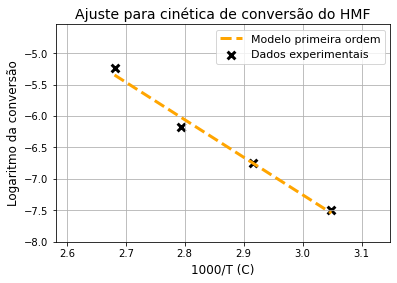

In [3]:
## Importando bibliotecas para o trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bibliotecas para regressão linear 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *

# Dados experimentais

vetor_T = [328,343,358,373]              # Temperatura (K)
vetor_X1 = [0.424,0.693, 0.875, 0.995]   # Conversão Xhmf
vetor_T = np.float_(vetor_T)

# Parâmetros operacionais

WHSV = 1.0       # 1/h
Ca0 = 0.1        # mol/L
rho = 1000       # g/L
R = 8.31         # J / mol K 

def modelo_primeira_ordem(WHSV, rho, vetor_T,vetor_X):  
    
    # Comando para importar comandos de matemática simbólica
    
    init_printing()
    var('x,y')
    f = Lambda(x, 1/(1-x))    
    
    # Criação dos vetores nulos
    
    lnK = []
    Int1 = []
    
    # Cálculo da integral - Equação de projeto reator PFR

    for X in vetor_X:
        int1 = integrate(f(x),(x,0,X))
        int1 = np.float_(int1)
        Int1 = np.append(Int1,int1)
    
    Int1 = np.reshape(np.array(Int1), [len(Int1),1]) 
    
    # Cálculo do valor das constantes cinéticas para cada T no intervalo

    for i,v in enumerate(Int1):        # equação de projeto considerando (ra) = k * Ca (modelo de primeira ordem)
        k = WHSV * v / rho   
        lnk = np.log(k) 
        lnK = np.append(lnK,lnk)       # vetor contendo os valores calculados para lnk em cada temperatura   
      
        
    lnK = lnK[::-1]                    # invertindo a sequência de valores para realização do gráfico                 
    lnK = np.array(lnK)
    lnK = np.reshape(np.array(lnK), [len(lnK),1])
     
    for i,T in enumerate(vetor_T):
        T = np.float_(T)
        vetor_T[i] = 1/T               # manipulando os valores de T para realização do gráfico
        
    vetor_T = np.sort(vetor_T)
    vetor_T = np.reshape(np.array(vetor_T), [len(vetor_T),1])
    
    # Regressão linear em relação para o modelo de Arrhenius

    modelo1 = LinearRegression().fit(vetor_T,lnK)
    coef_linear = modelo1.intercept_   # coef. linear (fator pré-exponencial)    
    coef_angular = modelo1.coef_       # coef. angular (energia de ativação)
    y_pred = vetor_T*coef_angular + coef_linear
    
    # Métricas de avaliação da qualidade do ajuste 
    
    coef_determ = modelo1.score(vetor_T,lnK)
    erro = mean_squared_error(lnK,y_pred)

    return y_pred, lnK, coef_determ, erro, coef_angular, coef_linear


# Obtenção dos dados para realização do gráfico

y_pred = modelo_primeira_ordem(WHSV,rho,vetor_T,vetor_X1)[0]
lnK = modelo_primeira_ordem(WHSV,rho,vetor_T,vetor_X1)[1]

# Obtenção dos parâmetros cinéticos

ER = modelo_primeira_ordem(WHSV,rho,vetor_T,vetor_X1)[4]
ER = np.float_(ER)
k0 = np.exp(modelo_primeira_ordem(WHSV,rho,vetor_T,vetor_X1)[5])
k0 = np.float_(k0)


print('\nO coeficiente de determinação do modelo é {:.3}\n'.format(modelo_primeira_ordem(WHSV,rho,vetor_T, vetor_X1)[2]))

print('\nOs parâmetros cinéticos do modelo foram {:.3} kJ/mol e {:.5} L/ g h \n'.format(abs(ER)*R*1e-03, k0))

# Retomando vetor de entrada da Temperatura 

vetor_T = [328,343,358,373]

for i,T in enumerate(vetor_T):
        T = np.float_(T)
        vetor_T[i] = 1/T
        
vetor_T = np.sort(vetor_T)
vetor_T = np.reshape(np.array(vetor_T), [len(vetor_T),1])

# Visualização dos dados

plt.scatter(vetor_T*1e3,lnK, marker = 'x', s = 60, color = 'black', linewidth = 3, label = 'Dados experimentais')
plt.plot(vetor_T*1e3, y_pred, color = 'orange', linewidth = 3, linestyle = '--', label ='Modelo primeira ordem')
plt.xlabel('1000/T (C)', fontsize = 12)
plt.ylabel('Logaritmo da conversão', fontsize = 12)
plt.title('Ajuste para cinética de conversão do HMF', fontsize = 14)
plt.xlim(min(vetor_T)*1e3 - 0.1 , max(vetor_T)*1e3 + 0.1)
plt.ylim(min(lnK) - 0.5, max(lnK) + 0.7)
plt.legend(loc ='upper right', fontsize = 11)
plt.grid()
plt.show()

## Estimação de parâmetros para dados de balanço de carbono

- Modelos de lei de potências fracionárias entre ordem 0 e 1 para os dados de Ferreira _et al._ (2019)

In [5]:
## Importando bibliotecas

# Importando bibiotecas para manipulação de dados e visualização gráfica
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Bibliotecas para regressão linear e matemática simbólica
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *

def modelo(WHSV,rho,vetor_T,vetor_X,Ca0,n):    
    
    # Comando para importar comandos de matemática simbólica
    
    init_printing()
    var('x,y')
    f = Lambda(x, 1/( (1-x)**n ))  
    
    # Criação dos vetores nulos
    
    lnK = []
    Int1 = []
    
    # Cálculo da integral - Equação de projeto reator PFR
    
    for X in vetor_X:
        int1 = integrate(f(x),(x,0,X))
        int1 = np.float_(int1)
        Int1 = np.append(Int1,int1)
    
    Int1 = np.reshape(np.array(Int1), [len(Int1),1])  

    # Cálculo do valor das constantes cinéticas para cada T no intervalo
    
    for i,v in enumerate(Int1):
        
        k = WHSV * v * (Ca0 ** (1-n)) / rho      # equação de projeto considerando (ra) = k * Ca ^(n) -> ordem fracionária
        lnk = np.log(k)
        lnK = np.append(lnK,lnk)                 # vetor contendo os valores calculados para lnk em cada temperatura   
        
    lnK = lnK[::-1]                              # invertindo a sequência de valores para realização do gráfico
    lnK = np.array(lnK)
    lnK = np.reshape(np.array(lnK), [len(lnK),1])
    
    
    for i,T in enumerate(vetor_T):
        T = np.float_(T)
        vetor_T[i] = 1/T                        # manipulando os valores de T para realização do gráfico 
        
    vetor_T = np.sort(vetor_T)
    vetor_T = np.reshape(np.array(vetor_T), [len(vetor_T),1])
    
    # Regressão linear para o modelo considerando a Lei de Arrhenius
    
    modelo1 = LinearRegression().fit(vetor_T,lnK)
    intercept = float(modelo1.intercept_)          # coeficiente linear
    slope = float(modelo1.coef_)                   # coeficiente angular 
    y_pred = vetor_T*slope + intercept
    
    # Métricas para avaliação da qualidade do ajuste
    
    coef_determ = modelo1.score(vetor_T,lnK)       
    erro = mean_squared_error(lnK,y_pred)

    return y_pred, lnK, coef_determ, erro, slope, intercept

# Parâmetro operacionais de obtenção dos dados experimentais

WHSV = 1.0  # 1/h
Ca0 = 0.1   # mol/L
R = 8.31    # J / mol K 
rho = 1000  # Kg/m³ h

# Variáveis para avaliação do modelo proposto

vetorT = [313,333,353,373,393,413,453,473]                      # Temperatura (K)
vetorBC = [0.912, 0.823,0.833, 0.824, 0.671,0.658,0.339,0.059]  # Balanço de carbono                                        
vetor_X =[]

# Transformando os valores de BC em conversão para produtos secundários 

for v in vetorBC:    
    X = 1 - v
    vetor_X = np.append(vetor_X,X)     # Conversão aos produtos secundários / paralelos
    

# Vetor para loop computacional

ordem = np.arange(0,1.1,0.1)

M = np.zeros((len(ordem),3))
M = np.reshape(np.array(M), [len(ordem),3])
M = pd.DataFrame(M, columns = ['Ordem', 'Energia de Ativação', 'Coef. Determinação'])

        
for j,n in enumerate(ordem):
            
    M.loc[j,'Ordem'] = n
    M.loc[j,'Energia de Ativação'] = - (modelo(WHSV,rho,vetorT,vetor_X,Ca0,n)[4]*R/1000)
    M.loc[j,'Coef. Determinação'] = modelo(WHSV,rho,vetorT,vetor_X,Ca0,n)[2]   
    
print(M)

    Ordem  Energia de Ativação  Coef. Determinação
0     0.0            16.649311            0.886642
1     0.1            17.140612            0.883321
2     0.2            17.656409            0.879536
3     0.3            18.197991            0.875266
4     0.4            18.766600            0.870495
5     0.5            19.363400            0.865215
6     0.6            19.989447            0.859426
7     0.7            20.645659            0.853137
8     0.8            21.332783            0.846368
9     0.9            22.051373            0.839149
10    1.0            22.801772            0.831518


## Estimação de parâmetros para balanço de carbono (BC)

- Ajuste polinomial e exponencial para os dados do balanço de carbono - Base de dados Ferreira et al. (2019)


- **Ajuste polinomial:**

$ BC = a \: T^{n} + b \: T^{n-1} \: + \: ... \: + \: c \: T^{0} $


- **Ajuste exponencial**:

$ BC = k_{0}\: exp\left( {a \: T} \right)$


onde:

$n$  : polinômio de maior grau proposto

   Ordem Polinômio  Coef. Determinação
0              1.0            0.869327
1              2.0            0.977609
2              3.0            0.988981
3              4.0            0.989034
4              5.0            0.991655

O coeficiente de determinação do modelo polinomial de quinta ordem é 0.992


O coeficiente de determinação do modelo exponencial é 0.945



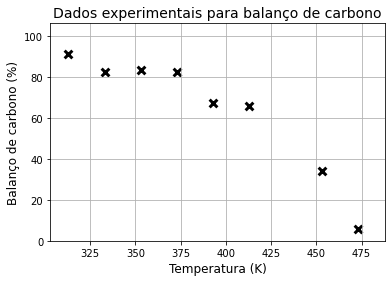

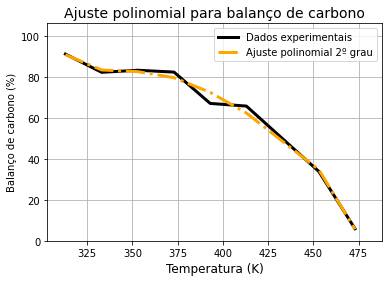

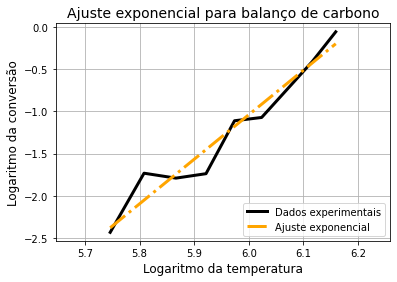

In [6]:
## Importando bibliotecas

# Bibliotecas para manipulação de dados e visualização gráfica
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Bibliotecas para regressão linear e matemática simbólica
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *

## Parâmetros operacionais

WHSV = 1.0  # 1/h
rho = 1.0   # g/L
Ca0 = 0.1   # mol/L

# Variáveis para avaliação do modelo proposto

T = [313,333,353,373,393,413,453,473]                            # Temperatura (K)
BC = [0.912, 0.823,0.833, 0.824, 0.671,0.658,0.339,0.059]        # Balanço de carbono
   
# Modelo para ajuste polinomial do balanço de carbono: BC(T) = A*(T**n) + B*(T**n-1) + C*(T**n-2) + ... + D*T + E

def ajuste_polinomial(vetor_T, vetor_BC, grau): 
    
    y = np.polyfit(vetor_T,vetor_BC,grau)
    y = np.poly1d(y)
    y_pred = y(vetor_T)
    
    # Métricas para avaliação do fit do modelo

    erro = mean_squared_error(vetor_BC, y_pred)
    coef_determ = r2_score(vetor_BC, y_pred)
    
    return y_pred,erro,coef_determ, y

# Modelo para ajuste exponencial para o balanço de carbono: BC(T) = A * exp(B*T)

# Avaliação do fit dos modelos propostos

ordem = np.arange(1,6,1)

M = np.zeros((len(T),len(ordem)))
M = np.reshape(np.array(M), [len(T),len(ordem)])
M = pd.DataFrame(M)

N = np.zeros((len(ordem),2))
N = np.reshape(np.array(N), [len(ordem),2])
N = pd.DataFrame(N, columns = ['Ordem Polinômio', 'Coef. Determinação'])

for i,n in enumerate(ordem):
    
    y_pred = ajuste_polinomial(T,BC,n)[0]
    coef_determ = ajuste_polinomial(T,BC,n)[2]
    
    M.loc[:,i] = y_pred
    N.loc[i,'Ordem Polinômio'] = n
    N.loc[i,'Coef. Determinação'] = coef_determ

print(N)

# Visualização dos dados para ajustes dos dados

y_pred1 = ajuste_polinomial(T,BC,5)[0]
erro1 = ajuste_polinomial(T,BC,5)[1]
coef_determ1 = ajuste_polinomial(T,BC,5)[2]
polin1 = ajuste_polinomial(T,BC,5)[3]
print('\nO coeficiente de determinação do modelo polinomial de quinta ordem é {:.3}\n'.format(coef_determ1))

fig, axis = plt.subplots()

# Gráfico dados experimentais - Ferreira et al (2019)

BC = [100*elem for elem in BC]
y_pred1 = [100*elem for elem in y_pred1]

axis.scatter(T, BC, marker = 'x', s = 60, color = 'black', linewidth = 3, label = 'Dados experimentais')
axis.set_xlabel('Temperatura (K)', fontsize = 12)
axis.set_ylabel('Balanço de carbono (%)',fontsize = 12)
axis.set_title('Dados experimentais para balanço de carbono', fontsize = 14)
axis.set_xlim(min(T) -10, max(T)+15)
axis.set_ylim(0, max(BC) + 15)
axis.grid()

fig, axis = plt.subplots()

# Gráfico ajuste polinomial

axis.plot(T, BC, color = 'black', linewidth = 3, label = 'Dados experimentais')
axis.plot(T,y_pred1, color = 'orange', linewidth = 3, linestyle = '-.', label ='Ajuste polinomial 2º grau')

axis.set_xlabel('Temperatura (K)', fontsize = 12)
axis.set_ylabel('Balanço de carbono (%)')
axis.set_title('Ajuste polinomial para balanço de carbono', fontsize = 14)
axis.set_ylim(0,max(BC) + 15)
axis.set_xlim(min(T) -10, max(T)+15)
axis.legend(loc ='upper right', fontsize = 10)
axis.grid()


T = [313,333,353,373,393,413,453,473]  
T = np.float_(T)                                           
BC = [0.912, 0.823,0.833, 0.824, 0.671,0.658,0.339,0.059] 

# Criação de vetores nulos

vetor_X =[]

# Transformando os valores de BC em conversão para produtos secundários 

for v in BC:   
    X = 1 - v
    vetor_X = np.append(vetor_X,X)

# Modelo para ajuste exponencial para o balanço de carbono: BC(T) = A * exp(B*T)

def ajuste_exponencial(vetor_T,vetor_X): 
    
    Log_T = np.log(vetor_T)
    Log_X = np.log(vetor_X)
    curve_fit = np.polyfit(Log_T,Log_X,1)
    y = np.poly1d(curve_fit)
    y_pred = y(Log_T)
    
    # Métricas para avaliação do fit do modelo
    
    erro = mean_squared_error(Log_X, y_pred)
    coef_determ = r2_score(Log_X, y_pred)
    
    return y_pred,erro,coef_determ,y

Log_T = np.log(T)
Log_X = np.log(vetor_X)
y_pred2 = ajuste_exponencial(T,vetor_X)[0]
erro2 = ajuste_exponencial(T,vetor_X)[1]
coef_determ2 = ajuste_exponencial(T,vetor_X)[2]
polin2 = ajuste_exponencial(T,vetor_X)[3]

print('\nO coeficiente de determinação do modelo exponencial é {:.3}\n'.format(coef_determ2))

# Gráfico Ajuste exponencial 

fig, axs = plt.subplots()

axs.plot(Log_T, Log_X, color = 'black', linewidth = 3, label ='Dados experimentais')
axs.plot(Log_T,y_pred2, color = 'orange', linewidth = 3, linestyle = '-.', label = 'Ajuste exponencial')
axs.set_xlabel('Logaritmo da temperatura', fontsize = 12)
axs.set_ylabel('Logaritmo da conversão', fontsize = 12)
axs.set_title('Ajuste exponencial para balanço de carbono', fontsize = 14)
axs.set_ylim(min(Log_X) - 0.1, max(Log_X) + 0.1)
axs.set_xlim(min(Log_T) - 0.1, max(Log_T) + 0.1)
axs.legend(loc = 'lower right', fontsize = 10)
axs.grid()
plt.show() 

## Ajuste preliminar para ajustes polinomiais  

- Análise com dados experimentais de Ferreira et al. (2019) 

   Ordem Polinômio  Coef. Determinação
0              1.0            0.869327
1              2.0            0.977609
2              3.0            0.988981
3              4.0            0.989034
4              5.0            0.991655


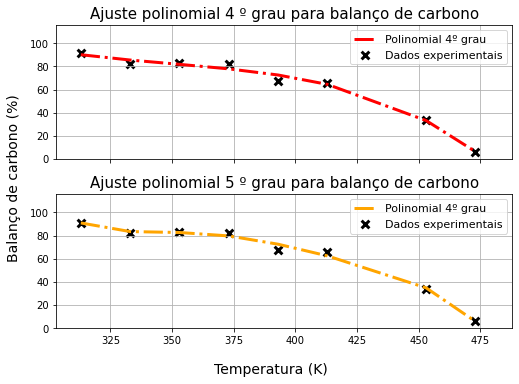

In [7]:
## Importando bibliotecas

# Bibliotecas para manipulação de dados e visualização gráfica
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Bibliotecas para regressão linear e matemática simbólica
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *

# Modelo para ajuste polinomial do balanço de carbono: BC(T) = A*(T**n) + B*(T**n-1) + C*(T**n-2) + ... + D*T + E

def ajuste_polinomial(vetor_T, vetor_BC, grau): 
    
    y = np.polyfit(vetor_T,vetor_BC,grau)
    y = np.poly1d(y)
    y_pred = y(vetor_T)
    
    # Métricas para avaliação do fit do modelo

    erro = mean_squared_error(vetor_BC, y_pred)
    coef_determ = r2_score(vetor_BC, y_pred)
    
    return y_pred,erro,coef_determ, y

# Definição da faixa de temperatura e da ordem dos polinômios

ordem = np.arange(1,6,1)
T1 = [313,333,353,373,393,413,453,473]
BC1 = [91.2, 82.3, 83.3, 82.4, 67.1, 65.8, 33.9, 5.90]

y_pred1 = ajuste_polinomial(T1,BC1,5)[0]
erro1 = ajuste_polinomial(T1, BC1,5)[1]
coef_determ1 = ajuste_polinomial(T1,BC1,5)[2]

# Criação da matriz com valores vazios 

M = np.zeros((len(T1),len(ordem)))
M = np.reshape(np.array(M), [len(T1),len(ordem)])
M = pd.DataFrame(M)

N = np.zeros((len(ordem),2))
N = np.reshape(np.array(N), [len(ordem),2])
N = pd.DataFrame(N, columns = ['Ordem Polinômio', 'Coef. Determinação'])

for i,n in enumerate(ordem):
    
    y_pred = ajuste_polinomial(T1,BC1,n)[0]
    coef_determ = ajuste_polinomial(T1,BC1,n)[2]
    
    # Preenchimento da matriz M 
    
    M.loc[:,i] = y_pred
    N.loc[i,'Ordem Polinômio'] = n
    N.loc[i,'Coef. Determinação'] = coef_determ 
    
print(N)

# Representação gráfica dos ajustes polinomiais (4º e 5º grau)

fig,axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(7,5))

axs[0].scatter(T1, BC1, marker = 'x', s = 60, color = 'black', linewidth = 3, label = 'Dados experimentais')
axs[0].plot(T1,M.loc[:,3],color = 'red', linewidth = 3, linestyle = '-.', label ='Polinomial 4º grau' )
axs[0].set_title('Ajuste polinomial 4 º grau para balanço de carbono', fontsize = 15)
axs[0].set_xlim(min(T1) - 10, max(T1) + 15)
axs[0].set_ylim(0, max(BC1) + 25)
axs[0].legend(loc ='upper right', fontsize = 11)
axs[0].grid()

axs[1].scatter(T1, BC1, marker = 'x', s = 60, color = 'black', linewidth = 3, label = 'Dados experimentais')
axs[1].plot(T1,M.loc[:,4],color = 'orange', linewidth = 3, linestyle = '-.', label ='Polinomial 4º grau' )
axs[1].set_title('Ajuste polinomial 5 º grau para balanço de carbono', fontsize = 15)
axs[1].set_xlim(min(T1) -10, max(T1) + 15)
axs[1].set_ylim(0, max(BC1) + 25)
axs[1].legend(loc ='upper right', fontsize = 11)
axs[1].grid()

fig.text(0.5, -0.05, 'Temperatura (K)', ha='center', fontsize = 14)
fig.text(-0.01, 0.27, 'Balanço de carbono (%)', ha = 'center', fontsize = 14, rotation = 'vertical')

plt.tight_layout()
plt.show()  

## Ajuste para o modelo polinomial do balanço de carbono

- Análise dos dados experimentais de Cadorini (2021)


O coeficiente de determinação do modelo exponencial é 0.465



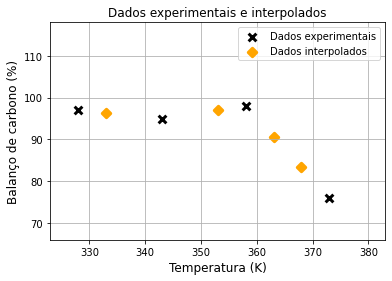

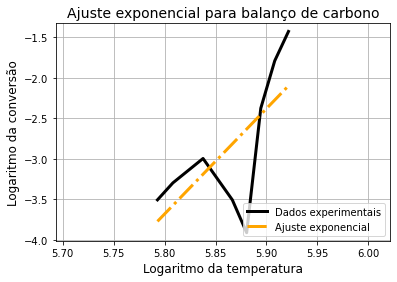

In [8]:
## Importando bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Curve fiiting para curva do balanço de carbono

# Dados para ajuste da curva do balanço de carbono

vetorT = [328,343,358,373]               # Valores experimentais (55-100 ºC) 
vetor_T2 = [333,353,363,368]             # Valores para interpolação e suavização da curva (55-100 ºC)
vetor_BC = [97.0, 95.0, 98.0, 76.0]      # Dados percentuais para balanço de carbono 
Y_interp = np.interp(vetor_T2, vetorT, vetor_BC)

# Interpolação linear dos dados 

vetor_T = np.append(vetorT, vetor_T2)
vetor_T = np.sort(vetor_T)
BC = [97.0, 95.0, 98.0, 76.0]

# Gráfico contendo dados experimentais e interpolados

plt.scatter(vetorT,vetor_BC,s = 60, color = 'black', linewidth = 3, label = 'Dados experimentais', marker = 'x')
plt.scatter(vetor_T2,Y_interp, label = 'Dados interpolados', marker = 'D', color = 'orange', linewidth = 3)
plt.xlabel('Temperatura (K)', fontsize = 12)
plt.ylabel('Balanço de carbono (%)', fontsize = 12)
plt.title('Dados experimentais e interpolados')
plt.ylim(min(BC)-10, max(BC) + 20)
plt.xlim(min(vetorT) - 5, max(vetorT) + 10)
plt.legend(loc = 'upper right', fontsize = 10)
plt.yticks(ticks = [70,80,90,100,110])
plt.grid()

##-------------------------------------------------------------------------------------------------------------------------

## Verificação do ajuste exponencial para o intervalo fornecido 

def ajuste_exponencial(vetor_T,vetor_X): 
    
    Log_T = np.log(vetor_T)
    Log_X = np.log(vetor_X)
    curve_fit = np.polyfit(Log_T,Log_X,1)
    y = np.poly1d(curve_fit)
    y_pred = y(Log_T)
    
    # Métricas para avaliação do fit do modelo
    
    erro = mean_squared_error(Log_X, y_pred)
    coef_determ = r2_score(Log_X, y_pred)
    
    return y_pred,erro,coef_determ,y

# Criação de vetores nulos

vetor_X = []

# Transformando os valores de BC em conversão para produtos secundários 

T2 = [328,333,343,353,358,363,368,373]
BC2 = [0.97, 0.963 , 0.95, 0.97, 0.98, 0.907, 0.833, 0.76]

for v in BC2:
    
    X = 1 - v
    vetor_X = np.append(vetor_X,X)

Log_T = np.log(T2)
Log_X = np.log(vetor_X)
y_pred2 = ajuste_exponencial(T2,vetor_X)[0]
erro2 = ajuste_exponencial(T2,vetor_X)[1]
coef_determ2 = ajuste_exponencial(T2,vetor_X)[2]
polin2 = ajuste_exponencial(T2,vetor_X)[3]

#print(polin2)

print('\nO coeficiente de determinação do modelo exponencial é {:.3}\n'.format(coef_determ2))

# Gráfico Ajuste exponencial 

fig, axs = plt.subplots()

axs.plot(Log_T, Log_X, color = 'black', linewidth = 3, label ='Dados experimentais')
axs.plot(Log_T,y_pred2, color = 'orange', linewidth = 3, linestyle = '-.', label = 'Ajuste exponencial')
axs.set_xlabel('Logaritmo da temperatura', fontsize = 12)
axs.set_ylabel('Logaritmo da conversão', fontsize = 12)
axs.set_title('Ajuste exponencial para balanço de carbono', fontsize = 14)
axs.set_ylim(min(Log_X) - 0.1, max(Log_X) + 0.1)
axs.set_xlim(min(Log_T) - 0.1, max(Log_T) + 0.1)
axs.legend(loc = 'lower right', fontsize = 10)
axs.grid()

plt.show() 

## Extrapolação dos ajustes polinomiais para validação fenomenológica

- Análise dos ajustes polinomiais obtidos para o conjunto de dados de Cadorini (2021)

   Ordem Polinômio  Coef. Determinação
0              2.0            0.890550
1              3.0            0.967452
2              4.0            0.971561
3              5.0            0.992874


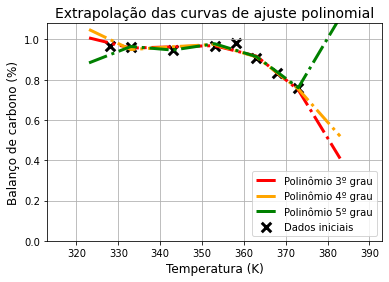

In [9]:
# Estimação dos parâmetros para ajuste polinomial e extrapolação

T2 = [328,333,343,353,358,363,368,373]
BC2 = [0.97, 0.964, 0.950, 0.97, 0.98, 0.907, 0.833, 0.76]
#BC2 = [100*elem for elem in BC2]

# Vetor contendo ordem dos polinôminios propostos para o ajuste
ajuste = np.arange(2,6,1)

# Matriz contendo os valores preditos para o intervalo da tempetura

P = np.zeros((len(T2),len(ajuste)))
P = np.reshape(np.array(P), [len(T2),len(ajuste)])
P = pd.DataFrame(M)

# Matriz contendo valor obtido para o coef. determinação (R²)

R = np.zeros((len(ajuste),2))
R = np.reshape(np.array(R), [len(ajuste),2])
R = pd.DataFrame(R, columns = ['Ordem Polinômio', 'Coef. Determinação'])

# Preenchimento da matriz com os valores preditos

for i,n in enumerate(ajuste):
    
    y_pred = ajuste_polinomial(T2,BC2,n)[0]
    coef_determ = ajuste_polinomial(T2,BC2,n)[2]
    
    P.loc[:,i] = y_pred
    R.loc[i,'Ordem Polinômio'] = n
    R.loc[i,'Coef. Determinação'] = coef_determ 

print(R)
    
# Vetor com intervalo de temperaturas do trabalho (40-120 ºC) 

T3 = np.arange(323,393,10)

# Definição da função para cálculo dos valores extrapolados

def extrap(T):
    
    polin3 = ajuste_polinomial(T2,BC2,3)[3]
    polin4 = ajuste_polinomial(T2,BC2,4)[3]
    polin5 = ajuste_polinomial(T2,BC2,5)[3]
    
    Y1 = polin3(T)
    Y2 = polin4(T)
    Y3 = polin5(T)
    
    return Y1, Y2, Y3
 
# Visualização gráfica da extrapolação dos dados

plt.scatter(T2,BC2, marker='x', s = 90, color = 'black', 
            linewidth = 3, label = 'Dados iniciais' )
plt.plot(T3, extrap(T3)[0], color = 'red', linewidth = 3, 
         label = 'Polinômio 3º grau', linestyle = '-.')
plt.plot(T3, extrap(T3)[1], color = 'orange', linewidth = 3, 
         label = 'Polinômio 4º grau', linestyle = '-.')
plt.plot(T3, extrap(T3)[2], color = 'green', linewidth = 3, 
         label = 'Polinômio 5º grau', linestyle = '-.' )

plt.ylim(0, max(BC2) + 0.1)
plt.xlim(min(T3)-10, max(T3)+10)
plt.xlabel('Temperatura (K)', fontsize =12)
plt.ylabel('Balanço de carbono (%)', fontsize = 12)
plt.title('Extrapolação das curvas de ajuste polinomial', fontsize = 14)
plt.legend(loc = 'lower right', fontsize = 10)
plt.grid()

## Gráfico da superfície 3D 

- Visualização da função objetivo em função das variáveis WHSV e T

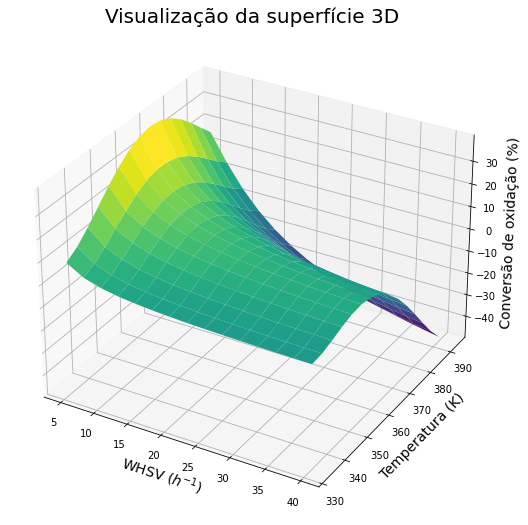

In [10]:
## Importando bibliotecas 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Definição dos vetores

N = 15
WHSV = np.linspace(5,40,N)
T = np.linspace(333,393,N)

# Definição dos parâmetros cinéticos - Reação de conversão do HMF (seção 4.1)

EA = 49.7e03       # J / mol
k0 = 47.35e03      # L / g h 
R = 8.31           # J / mol K 

# Definição da função objetivo do problema

def func_obj (WHSV,T):
    
    rho = rho_agua(T)
    k1 = k0*np.exp(-EA / (R * T))
    BM = np.exp(- (k1 * rho)/ WHSV )
    
    BC = extrap(T)[1]       # polinômio de 4º grau extrapolado para o conjunto de dados
    
    Xoxi = (BC - BM)*100    # Cálculo da conversão de oxidação     
    
    return  Xoxi

X,Y = np.meshgrid(WHSV,T)
Z = func_obj(X,Y)

# Visualização da superfície 3D

fig = plt.figure(figsize = (14,9))
ax = plt.axes(projection = '3d')
sup = ax.plot_surface(X,Y,Z, cmap = "viridis", linewidth = 1)
ax.set_xlabel('WHSV ($h^{-1}$)', fontsize=14)
ax.set_ylabel('Temperatura (K)',fontsiz=14)
ax.set_zlabel("Conversão de oxidação (%)", fontsize = 14)
ax.set_title('Visualização da superfície 3D',fontsize=20)
plt.show()

## Implementação dos algoritmos de otimização

- Programação quadrática sequencial (SQP)
- Algoritmo Trust-Region Constrained Algorithm + BFGS 

In [11]:
## Ajustando as funções para implementação do algoritmo de otimização

## Importando biblioteca scipy

from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
#from scipy.optimize import SR1
import warnings
warnings.simplefilter('ignore')

# Definição dos parâmetros cinéticos

EA = 49.7e03       # J / mol
k0 = 47.35e03      # L / g h 
R = 8.31           # J / mol K 

# Definição da função objetivo do problema de otimização

def func_obj (x):
    
    #x[0] = WHSV 
    #x[1] = T
    
    rho = rho_agua(x[1])
    k1 = k0*np.exp(-EA / (R * x[1]))
    BM = np.exp(- (k1 * rho)/ x[0])
    
    BC = extrap(x[1])[1]       ## polinômio de 4º grau extrapolado para o conjunto de dados
    
    Xoxi = BC - BM             # função minimizada (Xoxi = BM - BC) 
    
    return - Xoxi


# Restrição para conversão Xhmf (0 < Xhmf < 1 ---> -1 < - Xhmf <0)

def rest1(x):
    
    # x[0] = WHSV
    # x[1] = T
    
    rho = rho_agua(x[1])
    k1 = k0*np.exp(-EA / (R *x[1]))
    BM = np.exp(-k1 * rho / x[0])
    
    Xhmf = 1 - BM  
    
    return - Xhmf      # função minimizada (- Xhmf = BM - 1 )


# Restrição balanço de carbono (0 < BC < 1 ---> -1 < - BC <0)

def rest2(x):
    
    BC = extrap(x[1])[1]      ## polinômio de 4º grau extrapolado para o conjunto de dados
    
    return - BC               # função minimizada (-BC)


# Limites de busca para WHSV e Temperatura 

bounds = Bounds([5,40], [333,393])

# Definição das restrições não lineares

Rest1 = NonlinearConstraint(func_obj, -1, 0, jac = '2-point', hess = BFGS() )
Rest2 = NonlinearConstraint(rest1, -1, 0, jac= '2-point', hess = BFGS() )
Rest3 = NonlinearConstraint(rest2, -1, 0 , jac= '2-point', hess = BFGS() )

# Junção das restrições não lineares

cons = [Rest1, Rest2, Rest3]

## Implementação algoritmo 

X0 = [10,340]

# Método 1 - Sequencial Least Squares Programming Algorithm (SLSQP)

sol1 = minimize(func_obj, X0, method = 'SLSQP', jac = "2-point",  
               constraints = cons, options={'ftol': 1e-9, 'disp': True}, bounds = bounds)

# Método 2 - Trust-Region Constrained Algorithm 

sol2 = minimize(func_obj, X0, method = 'trust-constr', jac = "2-point", hess = BFGS(),
                constraints = cons, bounds = bounds, options = {'verbose':2})
print(sol1.x)
print(sol2.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.395397422206099
            Iterations: 17
            Function evaluations: 73
            Gradient evaluations: 17
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   3   |   0   | -5.6315e-02 | 1.00e+00 | 6.72e-03 | 0.00e+00 |
|   2   |   6   |   1   | -5.6319e-02 | 5.60e+00 | 7.03e-03 | 0.00e+00 |
|   3   |   9   |   3   | -8.3705e-02 | 3.73e+01 | 8.08e-03 | 0.00e+00 |
|   4   |  12   |   4   | -1.2603e-01 | 4.09e+01 | 8.16e-03 | 0.00e+00 |
|   5   |  15   |   6   | -1.9892e-01 | 1.33e+02 | 1.82e-02 | 0.00e+00 |
|   6   |  18   |   7   | -2.6772e-01 | 1.33e+02 | 1.10e-02 | 0.00e+00 |
|   7   |  18   |   7   | -2.6772e-01 | 6.67e+02 | 3.03e-02 | 0.00e+00 |
|   8   |  24   |   8   | -3.9278e-01 | 6.67e+02 | 6.26e-04 | 0.00e+00 |
|   9   |  24   |   8   | -3.9278e-01 | 3.33e+03 | 1.35e-04 

## Análise transferência de massa intra e extra partícula

- **Critério de Mears**:

$CM = \frac{(-r_{obs} \: \rho_{c} \: d_{p} \: n)} { k_{c} \: C_{ab}}$

- Critério de Weisz-Prater

$CW = \frac{(-r_{obs} \: \rho_{c} \: d^{2} \: n)} { D_{e} \: C_{abs} } $

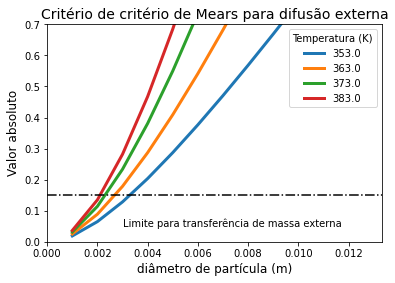

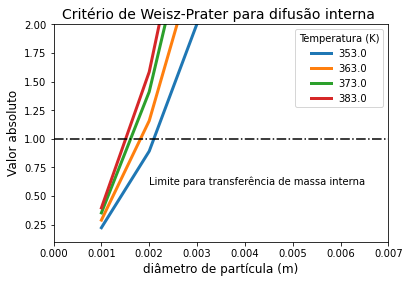

In [26]:
# Dimensões do reator - Calculadas a partir da massa de catalisador (W = 100 kgs) e das propriedades do catalisador

L = 1.5                     # comprimento do reator (m)
d = 0.3                     # diâmetro do reator (m)
area = np.pi * ((d**2)/4)   # área transversal do reator (m²)

# Parâmetros cinéticos

EA = 49.7e03       # J / mol
k0 = 47.35e03      # L / g h 
R = 8.31           # J / mol K
ER = EA/R          # K
n = 1              # ordem de reação - HMF

# Parâmetros operacionais

Ca0 = 0.1                  # mol/L [=] kmol/m³
Cb = Ca0                   # mol/L
Fa0 = 500/3600             # kg/s (Condição otimizada)   
X = - rest1([5,367.6])     # Valor para conversão de Xhmf (condição otimizada)

# Propriedades do catalisador

tort = 2.4          # tortuosidade
por = 0.59          # porosidade
pc = 2.2e3          # densidade do catalisador (Kg/m³)


# Definição para cálculo do coef. de transferência de massa e difusividade mássica

def coef_transmassa (Fa0, dp):
    
    rho = rho_agua(T)
    visc = visc_agua(T)
    velsup = (Fa0/rho*area)   # velocidade superficial (m/s)
    
    # Calculando número de Reynolds da partícula
    
    Rep = (rho * velsup * dp)/ visc
    
    # Calculando a difusividade do HMF - Parâmetros da equação 
    
    alfa = 2.704e-15
    beta = -1.0034
    
    Dab = (alfa)*((visc)**beta)*T
    
    # Calculando número de Schmidt
    
    Sc = visc /(rho*Dab)
    
    # Calculando coeficiente de transferência de massa
    
    kc = (Dab/dp)*(2 + 0.6*(Rep**1/2)*(Sc**1/3))
    
    return kc, Dab  


# Definição para cálculo dos parâmetros da limitação de transferência de massa

def Criterios (T,X,d,n,kc,Ca0,Dhmf):
    
    # Calculando a taxa de reação em função dos parâmetros reacionais
    
    K = k0*np.exp(-ER/T)
    taxa = K*Ca0*(1-X)
    taxa = taxa /3600    # kmol / kg s
    
    # Calculando propriedades do catalisador
    
    pb = (1-por)*pc
    De = Dhmf * por / tort        # difusividade efetiva
    
    # Critério de Mears para difusão externa
    
    CM = (taxa * pb * (d/2) ) / (kc * Ca0)
    
    # Critério de Weisz-Prater para difusão interna
    
    CW = (taxa * pc * (d/2)**2) / (De * Ca0)
    
    return CM,CW

# Criação dos vetores

vetorT = np.arange(353,393,10)
vetorT = np.float_(vetorT)
N = 10
dpmin = 0.01
dpart = np.linspace(dpmin/10,dpmin,N)
dpart = np.float_(dpart)

A = np.zeros((len(dpart),len(vetorT)*4))
A = pd.DataFrame(A)

# Preenchimento da matriz A e cálculos dos valores de CM e CW

for k,T in enumerate(vetorT):
    
    A.loc[:,4*k] = T

    for i,d in enumerate(dpart):
    
        kc =  coef_transmassa(Fa0,d)[0] 
        Dhmf = coef_transmassa(Fa0,d)[1]
        
        # Critério para difusão externa
        CM = Criterios(T,X,d,n,kc,Ca0,Dhmf)[0]
        
        # Critério para difusão interna
        CW = Criterios(T,X,d,n,kc,Ca0,Dhmf)[1]

        A.loc[i,4*k + 1 ] = d         # diâmetro de partícula  
        A.loc[i,4*k + 2 ] = CM        # difusão externa
        A.loc[i,4*k + 3 ] = CW        # difusão interna

        
# Visualização gráfica para difusão extrapartícula

#fig1 = plt.figure(figsize = (14,9))       

for i,T in enumerate(vetorT):
    
    plt.plot(A.loc[:,4*i+1], A.loc[:,4*i+2], linewidth = 3,label = '{:.4}'.format(T))

plt.axhline(y = 0.15, xmin = 0, xmax = 1, color = 'k', linestyle = '-.')
plt.annotate('Limite para transferência de massa externa', (0.003, 0.05), fontsize = 10)
plt.legend(loc = 'upper right', title = 'Temperatura (K)', fontsize = 10)  
plt.xlim(0, dpmin + dpmin/3)
plt.ylim(0,0.7)
plt.xlabel('diâmetro de partícula (m)', fontsize = 12)
plt.ylabel('Valor absoluto', fontsize = 12)
plt.title('Critério de critério de Mears para difusão externa', fontsize = 14) 
plt.show()


# Visualização gráfica para difusão intrapartícula

#fig2 = plt.figure(figsize = (12,9))

for i,T in enumerate(vetorT):
    
    plt.plot(A.loc[:,4*i+1], A.loc[:,4*i+3], linewidth = 3, label = '{:.4}'.format(T))

plt.axhline(y = 1, xmin = 0, xmax = 1, color = 'k', linestyle = '-.')
plt.annotate('Limite para transferência de massa interna', (0.002, 0.60), fontsize = 10)
plt.legend(loc = 'upper right', title = 'Temperatura (K)', fontsize = 10)  
plt.xlim(0,0.007)
plt.ylim(0.1,2)
plt.xlabel('diâmetro de partícula (m)', fontsize = 12)
plt.ylabel('Valor absoluto', fontsize = 12)
plt.title('Critério de Weisz-Prater para difusão interna ', fontsize = 14) 
plt.show()

In [27]:
# Parâmetro operacionais de obtenção dos dados experimentais

WHSV = 5.0  # 1/h
Ca0 = 0.1   # mol/L
R = 8.31    # J / mol K 
rho = 1000  # Kg/m³ h

# Variáveis para avaliação do modelo proposto

vetorT = np.arange(333,373,5)
vetorT = np.float_(vetorT)

# Construção do vetor de conversão

vetorX = []

for T in vetorT:
    
    Xoxi = - func_obj([WHSV,T])
    vetorX = np.append(vetorX,Xoxi)

## Obtenção dos parâmetros cinéticos

ER = modelo_primeira_ordem(WHSV,rho,vetorT,vetorX)[4]
ER = np.float_(ER)
k0 = np.exp(modelo_primeira_ordem(WHSV,rho,vetorT,vetorX)[5])
k0 = np.float_(k0)

print('\nO coeficiente de determinação do modelo é {:.3}\n'.format(modelo_primeira_ordem(WHSV,rho,vetorT, vetorX)[2]))

print('\nOs parâmetros cinéticos do modelo foram {:.3} kJ/mol e {:.5} L/ g h \n'.format(abs(ER)*R*1e-03, k0))


O coeficiente de determinação do modelo é 0.943


Os parâmetros cinéticos do modelo foram 51.4 kJ/mol e 5.6792e+04 L/ g h 

